# 1. Read data & basic informations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv("bitcoin_price.csv")
raw_data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [4]:
df = raw_data.copy()
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [8]:
df.shape

(1556, 7)

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


# 2. Data Pre-processing

In [17]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [19]:
df['Date'] = df['Date'].astype('datetime64[ns]')
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [23]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [25]:
# The data was collected from April 28, 2013, to July 31, 2017

In [27]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [29]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [33]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [35]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Market Cap
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [37]:
df = df.sort_index(ascending = False).reset_index()
df

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [38]:
df.drop(['index'], axis = 1, inplace = True)

# 3. The change in price of the stock overtime

In [40]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [41]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

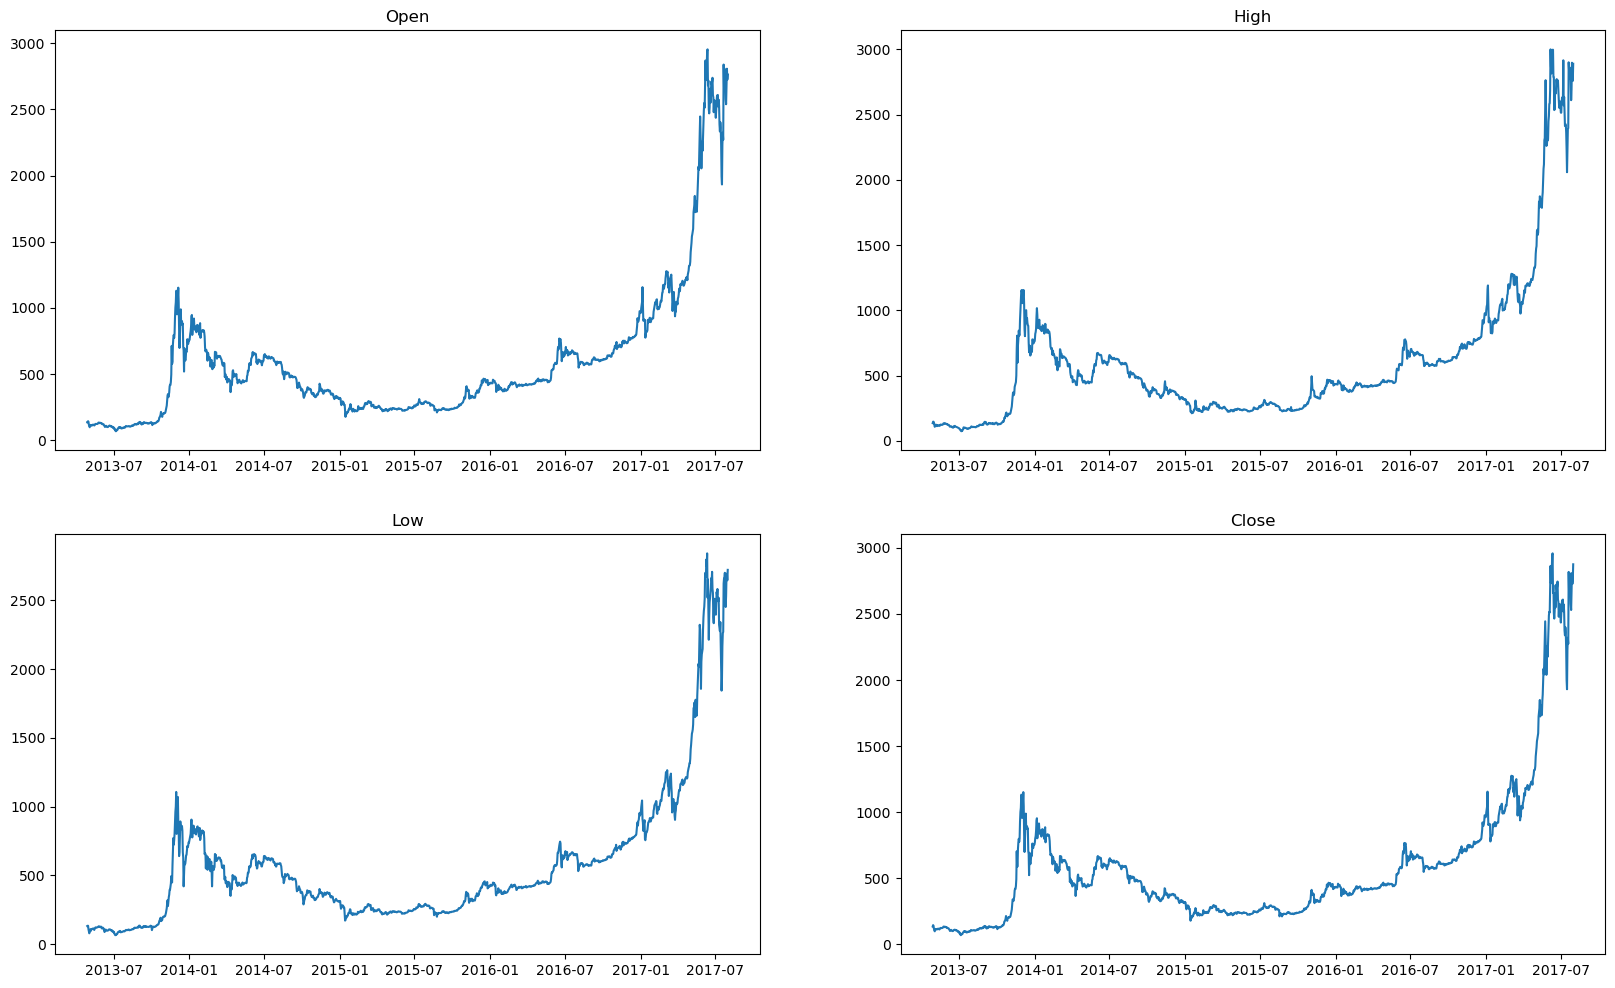

In [42]:
plt.figure(figsize = (20,12))

for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2, 2, index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

In [43]:
# The charts show Bitcoin's price trends (Open, High, Low, Close) from 2013 to 2017, with an initial spike in early 2014, followed by a period of stability. 
# A strong upward trend began in 2016, leading to significant price increases by mid-2017.

# 4. Candlestick Chart: Bitcoin Since March 2017

In [146]:
!pip install chart-studio
!pip install plotly

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [147]:
init_notebook_mode(connected=True)

In [65]:
bitcoin_sample = df[(df['Date'].dt.year == 2017) & (df['Date'].dt.month > 4)]

In [66]:
trace = go.Candlestick(x = bitcoin_sample['Date'], 
              high = bitcoin_sample['High'], 
              open = bitcoin_sample['Open'], 
              close = bitcoin_sample['Close'], 
              low = bitcoin_sample['Low'])

In [67]:
candle_data = [trace]

layout = {
    'title':'Bitcoin Since March 2017' , 
    'xaxis':{'title':'Date'}
}

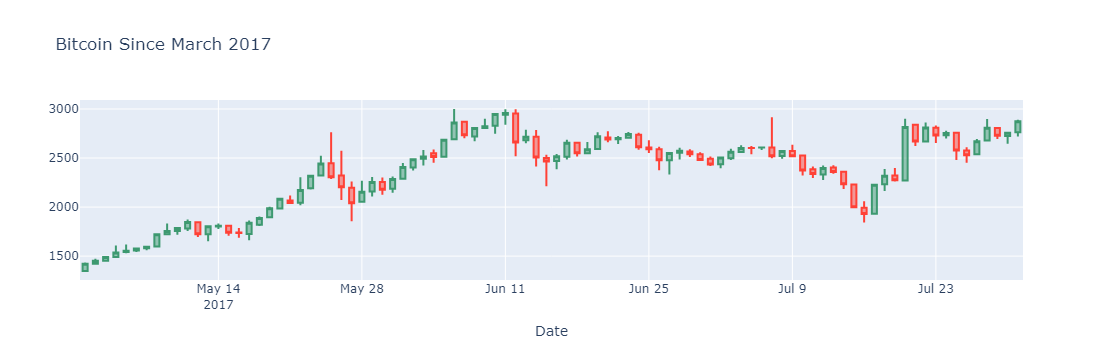

In [68]:
fig = go.Figure(data = candle_data, layout = layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [ ]:
# The chart shows a strong upward trend in Bitcoin's price from May to June 2017, indicating rapid market growth. 
# However, the increased volatility from June onwards suggests heightened market uncertainty or corrections after the initial surge.

# 5. Closing price in-depth

<Axes: >

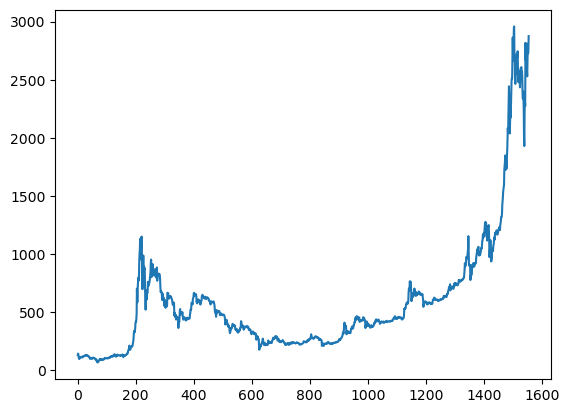

In [76]:
df['Close'].plot()

In [80]:
df.set_index('Date', inplace = True)

In [82]:
df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

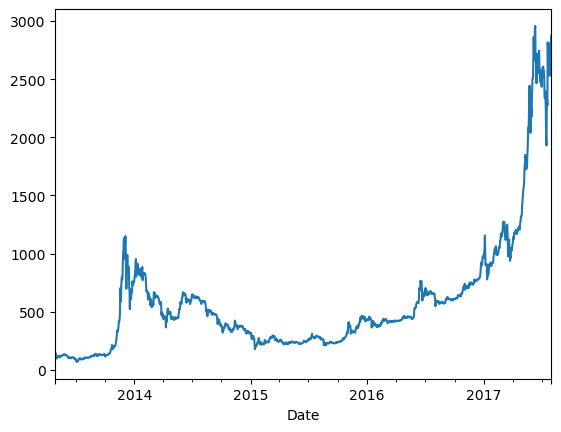

In [84]:
df['Close'].plot()

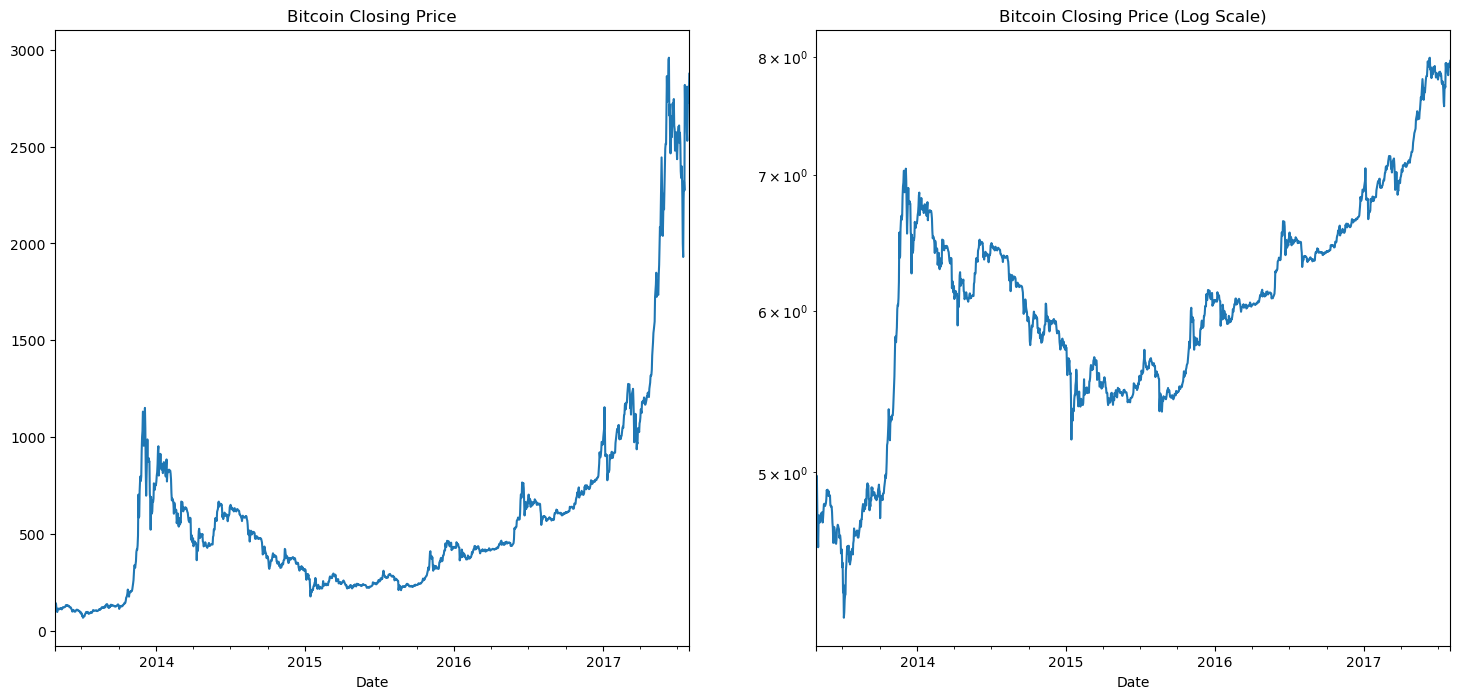

In [96]:
plt.figure(figsize = (18, 8))

plt.subplot(1, 2, 1)
df['Close'].plot()
plt.title('Bitcoin Closing Price')

plt.subplot(1, 2, 2)
np.log1p(df['Close']).plot()
plt.title('Bitcoin Closing Price (Log Scale)')
plt.yscale('log')

In [98]:
# The standard scale highlights Bitcoin's rapid price surge, but the log scale reveals a more consistent long-term growth pattern. 
# This suggests Bitcoin's price increases were exponential, with the log scale offering a clearer view of sustained upward trends.

# 6. Analysis of Bitcoin Closing Price: Yearly, Quarterly, and Monthly Trends

In [103]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


Text(0.5, 1.0, 'Bitcoin Closing Price Yearly')

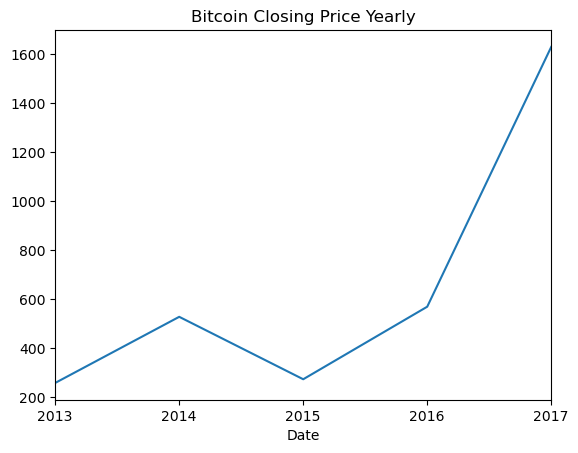

In [111]:
df['Close'].resample('Y').mean().plot()
plt.title('Bitcoin Closing Price Yearly')

Text(0.5, 1.0, 'Bitcoin Closing Price Quarterly')

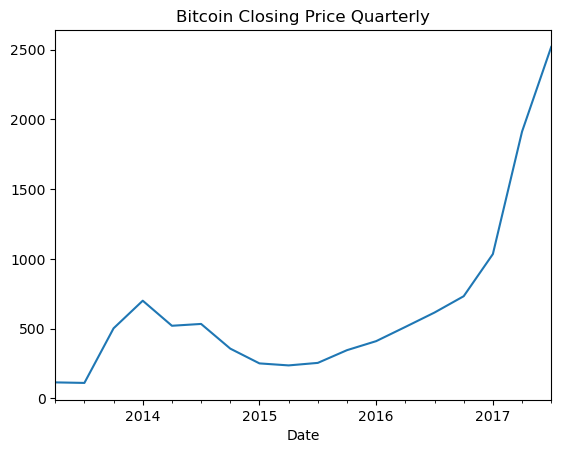

In [113]:
df['Close'].resample('Q').mean().plot()
plt.title('Bitcoin Closing Price Quarterly')

Text(0.5, 1.0, 'Bitcoin Closing Price Monthly')

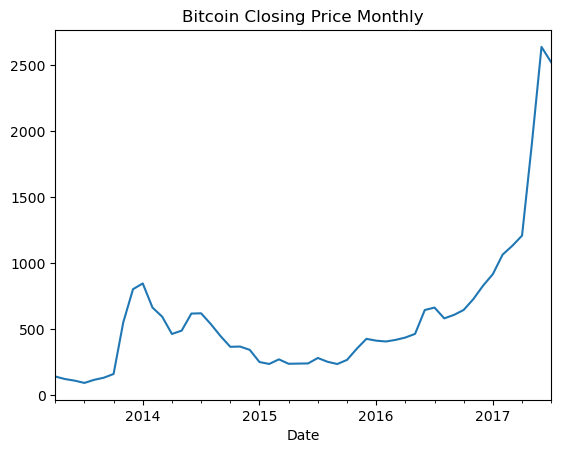

In [115]:
df['Close'].resample('M').mean().plot()
plt.title('Bitcoin Closing Price Monthly')

# 7. Daily Changes in Bitcoin Closing Price

In [124]:
df['Close_price_pct_change'] = df['Close'].pct_change() * 100

In [126]:
df['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

Text(0.5, 1.0, 'Daily Percentage Change in Bitcoin Closing Price')

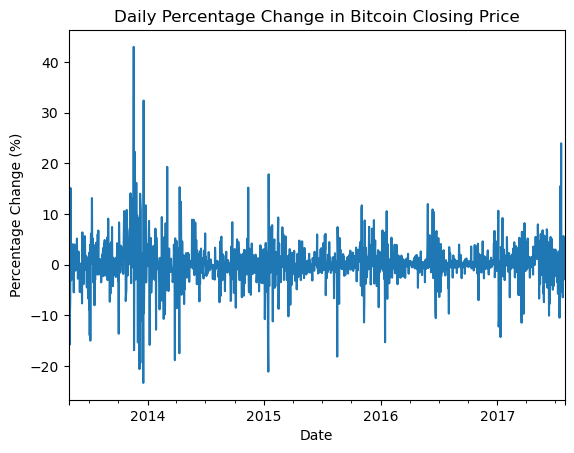

In [132]:
df['Close_price_pct_change'].plot(ylabel = 'Percentage Change (%)')
plt.title('Daily Percentage Change in Bitcoin Closing Price')

In [134]:
# The largest daily price fluctuations of Bitcoin occurred in 2013-2014, with extreme rises and falls. 
# After 2015, the volatility seems more stable, although occasional spikes still occur.

In [154]:
#!pip install cufflinks

import cufflinks as cf

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ------------------- ------------------ 41.0/81.7 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 760.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=e54ff2dcae4fab2b309c0de2302bf6d2f13c8ed3b335083b57f12d9384b4547d
  Stored in directory: c:\users\patrycja milo\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3b79f6cf66f7a
Successfully built cufflinks


In [156]:
cf.go_offline()

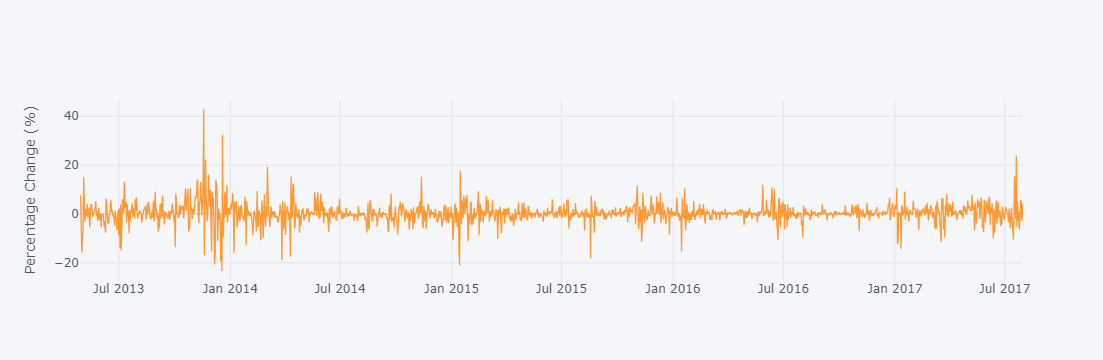

In [174]:
df['Close_price_pct_change'].iplot(yTitle = 'Percentage Change (%)')